In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.metrics as sklm
import xgboost as xgb
import matplotlib

In [85]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
submissions = pd.read_csv('SampleSubmission.csv')

In [90]:
print(train.shape)
print(test.shape)

(30557, 79)
(16136, 74)


In [93]:
traincols = list(train.columns)
testcols = list(test.columns)
#print(traincols)
#print(testcols)

In [41]:
#list(traincols)

In [89]:
train = train.drop(['Place_ID X Date', 'Place_ID', 'Date'], axis=1)

In [71]:
train = train.drop(['target', 'target_min', 'target_max', 'target_variance', 'target_count'], axis=1)

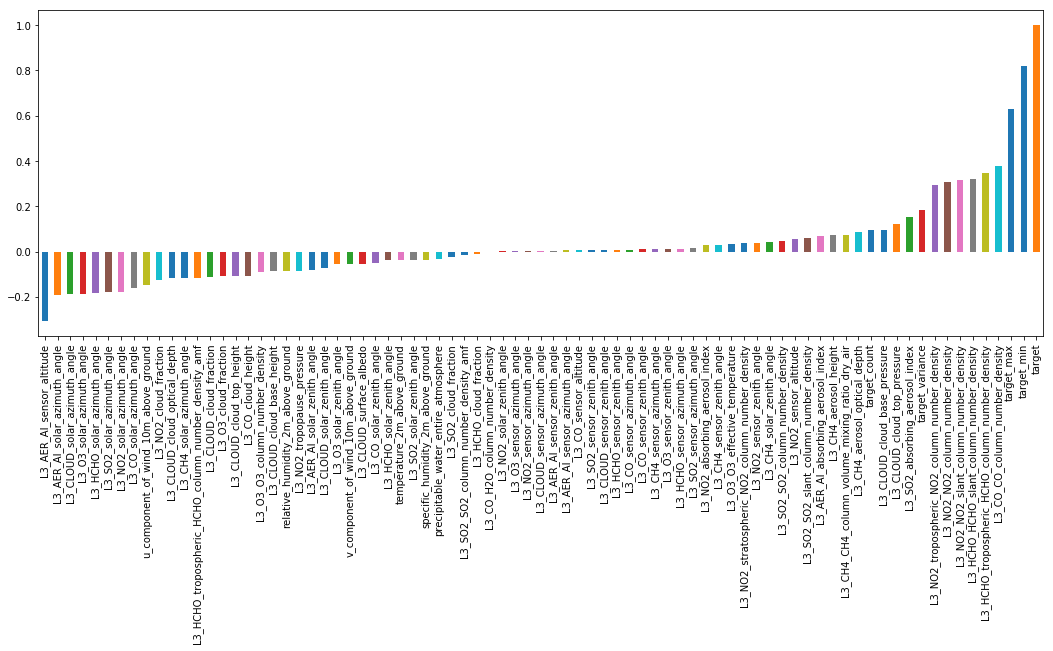

In [91]:
# Look at correlation with target
train.corr()['target'].sort_values().plot(kind='bar', figsize=(18, 6))

In [97]:
for i in traincols:
    train[i] = train[i] + 1
for j in testcols:
    test[j] = test[j] + 1

In [62]:
# Look at correlation with target
corr = dict(train.corr()['target'].sort_values())
#print(corr)

In [98]:
train.isna().sum()

target                                                0
target_min                                            0
target_max                                            0
target_variance                                       0
target_count                                          0
precipitable_water_entire_atmosphere                  0
relative_humidity_2m_above_ground                     0
specific_humidity_2m_above_ground                     0
temperature_2m_above_ground                           0
u_component_of_wind_10m_above_ground                  0
v_component_of_wind_10m_above_ground                  0
L3_NO2_NO2_column_number_density                   2189
L3_NO2_NO2_slant_column_number_density             2189
L3_NO2_absorbing_aerosol_index                     2189
L3_NO2_cloud_fraction                              2189
L3_NO2_sensor_altitude                             2189
L3_NO2_sensor_azimuth_angle                        2190
L3_NO2_sensor_zenith_angle                      

In [64]:
new_colss = []
for k, v in corr.items():
    if v < -0.03:
        new_colss.append(k)
    elif v > 0.03:
        new_colss.append(k)

In [65]:
(new_colss)

['L3_AER_AI_sensor_altitude',
 'L3_AER_AI_solar_azimuth_angle',
 'L3_CLOUD_solar_azimuth_angle',
 'L3_O3_solar_azimuth_angle',
 'L3_HCHO_solar_azimuth_angle',
 'L3_SO2_solar_azimuth_angle',
 'L3_NO2_solar_azimuth_angle',
 'L3_CO_solar_azimuth_angle',
 'u_component_of_wind_10m_above_ground',
 'L3_NO2_cloud_fraction',
 'L3_CLOUD_cloud_optical_depth',
 'L3_CH4_solar_azimuth_angle',
 'L3_HCHO_tropospheric_HCHO_column_number_density_amf',
 'L3_CLOUD_cloud_fraction',
 'L3_O3_cloud_fraction',
 'L3_CLOUD_cloud_top_height',
 'L3_CO_cloud_height',
 'L3_O3_O3_column_number_density',
 'L3_CLOUD_cloud_base_height',
 'relative_humidity_2m_above_ground',
 'L3_NO2_tropopause_pressure',
 'L3_AER_AI_solar_zenith_angle',
 'L3_CLOUD_solar_zenith_angle',
 'L3_O3_solar_zenith_angle',
 'v_component_of_wind_10m_above_ground',
 'L3_CLOUD_surface_albedo',
 'L3_CO_solar_zenith_angle',
 'L3_HCHO_solar_zenith_angle',
 'temperature_2m_above_ground',
 'L3_SO2_solar_zenith_angle',
 'specific_humidity_2m_above_ground'

In [66]:
for i in testcols:
    if i not in new_colss:
        test = test.drop(i, axis=1)
for j in traincols:
    if j not in new_colss:
        train = train.drop(j, axis=1)

In [67]:
Labels = np.array(train['target'])
print(Labels)

[ 38.  39.  24. ...  85. 103.  89.]


In [195]:
train = train.drop(['target'], axis=1)

In [75]:
Features = np.array(imputed_train_df)
test_enc = np.array(imputed_test_df)

In [76]:
import numpy.random as nr
import sklearn.model_selection as ms
## Randomly sample cases to create independent training and test data
nr.seed(9988)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 0.2)
x_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

In [77]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=400, max_depth=10, max_features='auto',
                            min_samples_leaf=1, min_samples_split=2, random_state=0)
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [201]:
xg_reg = xgb.XGBRegressor(objective = 'reg:squarederror', n_estimators = 2000, seed = 123, max_depth = 10,
                           learning_rate=0.01, booster = 'dart', base_score = 0.7, subsample = 0.8,
                           reg_lambda = 0.03)

eval_set = [(x_test, y_test)]
xg_reg.fit(x_train, y_train, eval_metric="rmse", eval_set=eval_set, verbose=True, early_stopping_rounds = 200)

[0]	validation_0-rmse:75.65793
Will train until validation_0-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:75.06488
[2]	validation_0-rmse:74.48061
[3]	validation_0-rmse:73.90739
[4]	validation_0-rmse:73.33833
[5]	validation_0-rmse:72.76641
[6]	validation_0-rmse:72.20766
[7]	validation_0-rmse:71.65364
[8]	validation_0-rmse:71.10912
[9]	validation_0-rmse:70.58141
[10]	validation_0-rmse:70.05051
[11]	validation_0-rmse:69.51927
[12]	validation_0-rmse:69.00068
[13]	validation_0-rmse:68.48720
[14]	validation_0-rmse:67.98641
[15]	validation_0-rmse:67.48785
[16]	validation_0-rmse:66.98943
[17]	validation_0-rmse:66.50098
[18]	validation_0-rmse:66.01865
[19]	validation_0-rmse:65.53390
[20]	validation_0-rmse:65.05791
[21]	validation_0-rmse:64.59037
[22]	validation_0-rmse:64.13315
[23]	validation_0-rmse:63.67968
[24]	validation_0-rmse:63.23553
[25]	validation_0-rmse:62.79012
[26]	validation_0-rmse:62.35596
[27]	validation_0-rmse:61.93624
[28]	validation_0-rmse:61.50740
[29]	validation_

[250]	validation_0-rmse:32.10016
[251]	validation_0-rmse:32.08267
[252]	validation_0-rmse:32.06726
[253]	validation_0-rmse:32.04887
[254]	validation_0-rmse:32.02968
[255]	validation_0-rmse:32.01094
[256]	validation_0-rmse:31.99563
[257]	validation_0-rmse:31.97882
[258]	validation_0-rmse:31.96358
[259]	validation_0-rmse:31.94573
[260]	validation_0-rmse:31.93248
[261]	validation_0-rmse:31.91895
[262]	validation_0-rmse:31.90228
[263]	validation_0-rmse:31.88135
[264]	validation_0-rmse:31.86461
[265]	validation_0-rmse:31.84906
[266]	validation_0-rmse:31.83658
[267]	validation_0-rmse:31.82118
[268]	validation_0-rmse:31.80772
[269]	validation_0-rmse:31.78960
[270]	validation_0-rmse:31.77146
[271]	validation_0-rmse:31.75470
[272]	validation_0-rmse:31.74109
[273]	validation_0-rmse:31.72241
[274]	validation_0-rmse:31.70700
[275]	validation_0-rmse:31.69334
[276]	validation_0-rmse:31.68254
[277]	validation_0-rmse:31.66934
[278]	validation_0-rmse:31.66075
[279]	validation_0-rmse:31.64970
[280]	vali

[499]	validation_0-rmse:30.37542
[500]	validation_0-rmse:30.37260
[501]	validation_0-rmse:30.37002
[502]	validation_0-rmse:30.36521
[503]	validation_0-rmse:30.35823
[504]	validation_0-rmse:30.35762
[505]	validation_0-rmse:30.35575
[506]	validation_0-rmse:30.35309
[507]	validation_0-rmse:30.35138
[508]	validation_0-rmse:30.34816
[509]	validation_0-rmse:30.34543
[510]	validation_0-rmse:30.34446
[511]	validation_0-rmse:30.34302
[512]	validation_0-rmse:30.34203
[513]	validation_0-rmse:30.34086
[514]	validation_0-rmse:30.33951
[515]	validation_0-rmse:30.33716
[516]	validation_0-rmse:30.33548
[517]	validation_0-rmse:30.33399
[518]	validation_0-rmse:30.33106
[519]	validation_0-rmse:30.32895
[520]	validation_0-rmse:30.32599
[521]	validation_0-rmse:30.32453
[522]	validation_0-rmse:30.32091
[523]	validation_0-rmse:30.31955
[524]	validation_0-rmse:30.31603
[525]	validation_0-rmse:30.31333
[526]	validation_0-rmse:30.31153
[527]	validation_0-rmse:30.30806
[528]	validation_0-rmse:30.30632
[529]	vali

[748]	validation_0-rmse:29.98564
[749]	validation_0-rmse:29.98100
[750]	validation_0-rmse:29.97924
[751]	validation_0-rmse:29.97707
[752]	validation_0-rmse:29.97628
[753]	validation_0-rmse:29.97633
[754]	validation_0-rmse:29.97539
[755]	validation_0-rmse:29.97449
[756]	validation_0-rmse:29.97381
[757]	validation_0-rmse:29.97201
[758]	validation_0-rmse:29.97047
[759]	validation_0-rmse:29.96867
[760]	validation_0-rmse:29.96791
[761]	validation_0-rmse:29.96731
[762]	validation_0-rmse:29.96721
[763]	validation_0-rmse:29.96617
[764]	validation_0-rmse:29.96536
[765]	validation_0-rmse:29.96499
[766]	validation_0-rmse:29.96340
[767]	validation_0-rmse:29.96326
[768]	validation_0-rmse:29.96267
[769]	validation_0-rmse:29.96230
[770]	validation_0-rmse:29.96239
[771]	validation_0-rmse:29.96121
[772]	validation_0-rmse:29.95981
[773]	validation_0-rmse:29.95870
[774]	validation_0-rmse:29.95779
[775]	validation_0-rmse:29.95591
[776]	validation_0-rmse:29.95565
[777]	validation_0-rmse:29.95442
[778]	vali

[997]	validation_0-rmse:29.77115
[998]	validation_0-rmse:29.77018
[999]	validation_0-rmse:29.76968
[1000]	validation_0-rmse:29.76925
[1001]	validation_0-rmse:29.76920
[1002]	validation_0-rmse:29.76794
[1003]	validation_0-rmse:29.76792
[1004]	validation_0-rmse:29.76690
[1005]	validation_0-rmse:29.76602
[1006]	validation_0-rmse:29.76450
[1007]	validation_0-rmse:29.76321
[1008]	validation_0-rmse:29.76322
[1009]	validation_0-rmse:29.76351
[1010]	validation_0-rmse:29.76319
[1011]	validation_0-rmse:29.76345
[1012]	validation_0-rmse:29.76300
[1013]	validation_0-rmse:29.76155
[1014]	validation_0-rmse:29.76139
[1015]	validation_0-rmse:29.76102
[1016]	validation_0-rmse:29.75984
[1017]	validation_0-rmse:29.75950
[1018]	validation_0-rmse:29.75944
[1019]	validation_0-rmse:29.75911
[1020]	validation_0-rmse:29.75861
[1021]	validation_0-rmse:29.75781
[1022]	validation_0-rmse:29.75740
[1023]	validation_0-rmse:29.75581
[1024]	validation_0-rmse:29.75481
[1025]	validation_0-rmse:29.75327
[1026]	validation

[1239]	validation_0-rmse:29.64556
[1240]	validation_0-rmse:29.64537
[1241]	validation_0-rmse:29.64524
[1242]	validation_0-rmse:29.64497
[1243]	validation_0-rmse:29.64476
[1244]	validation_0-rmse:29.64476
[1245]	validation_0-rmse:29.64450
[1246]	validation_0-rmse:29.64464
[1247]	validation_0-rmse:29.64422
[1248]	validation_0-rmse:29.64373
[1249]	validation_0-rmse:29.64294
[1250]	validation_0-rmse:29.64299
[1251]	validation_0-rmse:29.64214
[1252]	validation_0-rmse:29.64191
[1253]	validation_0-rmse:29.64128
[1254]	validation_0-rmse:29.63991
[1255]	validation_0-rmse:29.63946
[1256]	validation_0-rmse:29.63918
[1257]	validation_0-rmse:29.63787
[1258]	validation_0-rmse:29.63723
[1259]	validation_0-rmse:29.63687
[1260]	validation_0-rmse:29.63596
[1261]	validation_0-rmse:29.63525
[1262]	validation_0-rmse:29.63544
[1263]	validation_0-rmse:29.63511
[1264]	validation_0-rmse:29.63440
[1265]	validation_0-rmse:29.63422
[1266]	validation_0-rmse:29.63402
[1267]	validation_0-rmse:29.63379
[1268]	validat

[1480]	validation_0-rmse:29.55567
[1481]	validation_0-rmse:29.55533
[1482]	validation_0-rmse:29.55542
[1483]	validation_0-rmse:29.55493
[1484]	validation_0-rmse:29.55325
[1485]	validation_0-rmse:29.55310
[1486]	validation_0-rmse:29.55259
[1487]	validation_0-rmse:29.55263
[1488]	validation_0-rmse:29.55305
[1489]	validation_0-rmse:29.55287
[1490]	validation_0-rmse:29.55248
[1491]	validation_0-rmse:29.55238
[1492]	validation_0-rmse:29.55225
[1493]	validation_0-rmse:29.55185
[1494]	validation_0-rmse:29.55109
[1495]	validation_0-rmse:29.55066
[1496]	validation_0-rmse:29.55078
[1497]	validation_0-rmse:29.55016
[1498]	validation_0-rmse:29.54961
[1499]	validation_0-rmse:29.54917
[1500]	validation_0-rmse:29.54916
[1501]	validation_0-rmse:29.54914
[1502]	validation_0-rmse:29.54880
[1503]	validation_0-rmse:29.54875
[1504]	validation_0-rmse:29.54834
[1505]	validation_0-rmse:29.54809
[1506]	validation_0-rmse:29.54730
[1507]	validation_0-rmse:29.54718
[1508]	validation_0-rmse:29.54691
[1509]	validat

[1721]	validation_0-rmse:29.48746
[1722]	validation_0-rmse:29.48743
[1723]	validation_0-rmse:29.48756
[1724]	validation_0-rmse:29.48729
[1725]	validation_0-rmse:29.48679
[1726]	validation_0-rmse:29.48610
[1727]	validation_0-rmse:29.48588
[1728]	validation_0-rmse:29.48545
[1729]	validation_0-rmse:29.48522
[1730]	validation_0-rmse:29.48516
[1731]	validation_0-rmse:29.48486
[1732]	validation_0-rmse:29.48431
[1733]	validation_0-rmse:29.48413
[1734]	validation_0-rmse:29.48409
[1735]	validation_0-rmse:29.48414
[1736]	validation_0-rmse:29.48404
[1737]	validation_0-rmse:29.48383
[1738]	validation_0-rmse:29.48395
[1739]	validation_0-rmse:29.48359
[1740]	validation_0-rmse:29.48387
[1741]	validation_0-rmse:29.48343
[1742]	validation_0-rmse:29.48333
[1743]	validation_0-rmse:29.48322
[1744]	validation_0-rmse:29.48311
[1745]	validation_0-rmse:29.48317
[1746]	validation_0-rmse:29.48270
[1747]	validation_0-rmse:29.48246
[1748]	validation_0-rmse:29.48223
[1749]	validation_0-rmse:29.48193
[1750]	validat

[1962]	validation_0-rmse:29.43849
[1963]	validation_0-rmse:29.43775
[1964]	validation_0-rmse:29.43727
[1965]	validation_0-rmse:29.43734
[1966]	validation_0-rmse:29.43700
[1967]	validation_0-rmse:29.43690
[1968]	validation_0-rmse:29.43687
[1969]	validation_0-rmse:29.43664
[1970]	validation_0-rmse:29.43662
[1971]	validation_0-rmse:29.43634
[1972]	validation_0-rmse:29.43615
[1973]	validation_0-rmse:29.43600
[1974]	validation_0-rmse:29.43569
[1975]	validation_0-rmse:29.43552
[1976]	validation_0-rmse:29.43506
[1977]	validation_0-rmse:29.43493
[1978]	validation_0-rmse:29.43507
[1979]	validation_0-rmse:29.43492
[1980]	validation_0-rmse:29.43475
[1981]	validation_0-rmse:29.43421
[1982]	validation_0-rmse:29.43407
[1983]	validation_0-rmse:29.43375
[1984]	validation_0-rmse:29.43381
[1985]	validation_0-rmse:29.43323
[1986]	validation_0-rmse:29.43293
[1987]	validation_0-rmse:29.43237
[1988]	validation_0-rmse:29.43214
[1989]	validation_0-rmse:29.43230
[1990]	validation_0-rmse:29.43212
[1991]	validat

XGBRegressor(base_score=0.7, booster='dart', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.01, max_delta_step=0, max_depth=10,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=2000, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=123, reg_alpha=0,
       reg_lambda=0.03, scale_pos_weight=1, seed=123, subsample=0.8,
       tree_method=None, validate_parameters=False, verbosity=None)

In [83]:
preds = rf.predict(test_enc)
submissions.target = result
submissions.to_csv('basemodel.csv', index=False)

In [79]:
predictions = rf.predict(x_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predictions) ** 0.5

33.61611314642234

In [84]:
import pickle
filename = 'baseline_modelrf.sav'
pickle.dump(rf, open(filename, 'wb'))

In [82]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(test_enc)

In [209]:
result

array([49.291183, 43.26915 , 36.49934 , ..., 51.080997, 46.74288 ,
       47.885784], dtype=float32)

In [74]:
from sklearn.preprocessing import Imputer
imp_mean = Imputer( strategy='mean') #for median imputation replace 'mean' with 'median'
imp_mean.fit(test)
imputed_test_df = imp_mean.transform(test)

In [22]:
import sys
from impute.imputation.cs import fast_knn
sys.setrecursionlimit(100000) #Increase the recursion limit of the OS

# start the KNN training
imputed_training=fast_knn(train.values, k=30)

ModuleNotFoundError: No module named 'impute'

In [28]:
imputed_test_df

array([[ 1.16000004e+01,  3.02000008e+01,  4.08999994e-03, ...,
         1.40538379e+01, -7.12879810e+01,  2.41139929e+01],
       [ 1.83000011e+01,  4.29000015e+01,  5.94999967e-03, ...,
         1.40538379e+01, -7.12879810e+01,  2.41139929e+01],
       [ 1.76000004e+01,  4.12999992e+01,  5.89999976e-03, ...,
         1.40538379e+01, -7.12879810e+01,  2.41139929e+01],
       ...,
       [ 1.91706409e+01,  8.62000046e+01,  6.55999966e-03, ...,
         1.40538379e+01, -7.12879810e+01,  2.41139929e+01],
       [ 8.40000057e+00,  6.64000015e+01,  4.56999987e-03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 6.50000000e+00,  8.15999985e+01,  5.08000003e-03, ...,
         1.40538379e+01, -7.12879810e+01,  2.41139929e+01]])